# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata)

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
merge_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
merge_df.groupby(["Mouse ID", "Timepoint"]).size().sort_values()

Mouse ID  Timepoint
a203      0            1
q633      5            1
          0            1
q610      35           1
          30           1
                      ..
g989      20           2
          5            2
          10           2
          0            2
          15           2
Length: 1888, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID.


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = merge_df["Mouse ID"] != "g989"
merge_df2 = merge_df.loc[mask].reset_index(drop=True)

In [6]:
# Checking the number of mice in the clean DataFrame.
merge_df2["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_df = merge_df2.groupby("Drug Regimen")["Tumor Volume (mm3)"]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_df = pd.DataFrame({
    "Mean Tumor Volume": grouped_df.mean(),
    "Median Tumor Volume": grouped_df.median(),
    "Tumor Volume Variance": grouped_df.var(),
    "Tumor Volume Std. Dev.": grouped_df.std(),
    "Tumor Volume Std. Err.": grouped_df.sem()
})
# Assemble the resulting series into a single summary DataFrame.
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
merge_df2.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

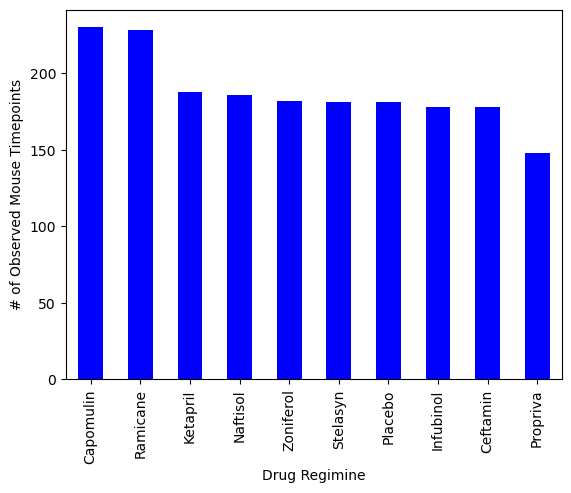

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = merge_df2["Drug Regimen"].value_counts()
drug_counts.plot(kind="bar", color="blue")
plt.xlabel("Drug Regimine")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

#Not sure how to do this without plt

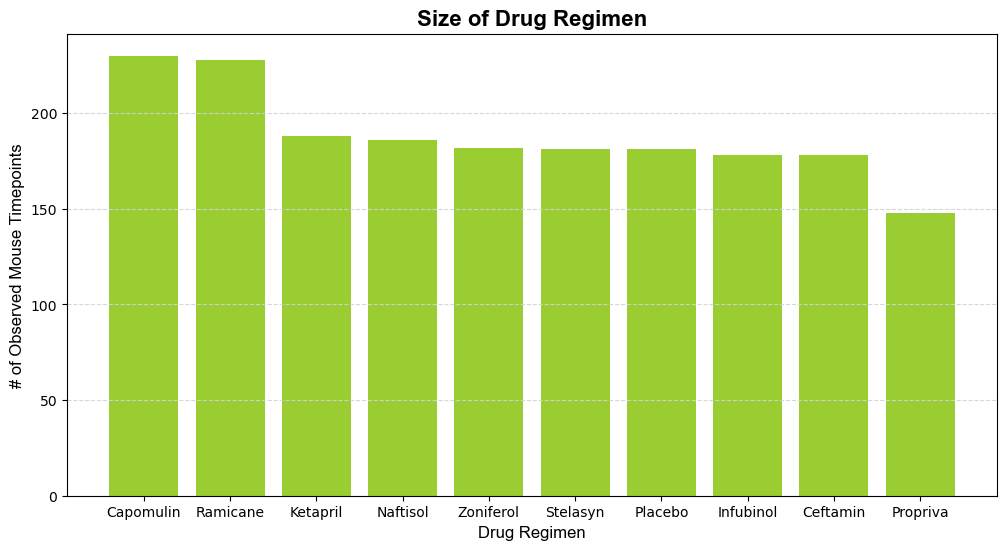

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data = merge_df2["Drug Regimen"].value_counts().sort_values(ascending=False)

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.bar(data.index, data.values, color="yellowgreen", align="center")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Drug Regimen", fontfamily="Arial", fontsize=12)
plt.ylabel("# of Observed Mouse Timepoints", fontfamily="Arial", fontsize=12)
plt.title("Size of Drug Regimen", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.9)

# Show/Save the Graph
plt.show()

In [22]:
merge_df2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


<Axes: ylabel='count'>

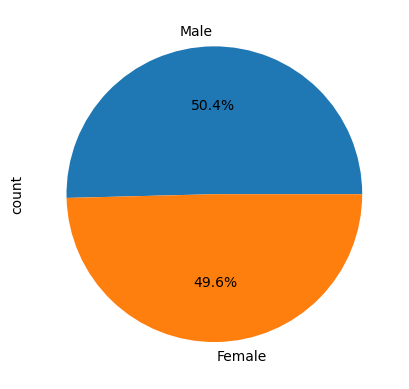

In [25]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = merge_df2[["Mouse ID", "Sex"]].drop_duplicates()

# Make the pie chart
unique_mice.Sex.value_counts().plot(kind="pie", autopct='%1.1f%%')

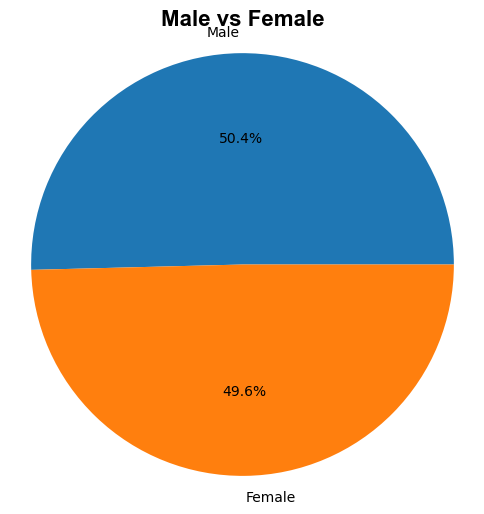

In [27]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
data = unique_mice.Sex.value_counts()

# Change Canvas Size
plt.figure(figsize=(6, 6))

# Create a basic plot
plt.pie(data.values, labels=data.index, autopct="%1.1f%%", shadow=False)

# Change colors
# Add in reference lines
# Add Labels/Title
plt.title("Male vs Female", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
plt.axis("equal")

# Show/Save the Graph
plt.show()

## Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouseS
max_time = merge_df2.groupby("Mouse ID").Timepoint.max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df3 = pd.merge(max_time, merge_df2, on=["Mouse ID", "Timepoint"], how="left")

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mask = merge_df3["Drug Regimen"].isin(drugs)
merge_df3 = merge_df3.loc[mask].reset_index(drop=True)
merge_df3

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [65]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = merge_df3['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.


for treatment in treatments:
    # Step 4: Locate the rows which contain mice on each drug and get the tumor volumes
    subset = merge_df3[merge_df3['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Step 5: Add the subset tumor volumes to the list for plotting
    tumor_vol_data.append(subset)
    
    # Step 6: Calculate the IQR for the current treatment group
    Q1 = subset.quantile(0.25)  # 25th percentile
    Q3 = subset.quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    
    # Step 7: Determine the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Step 8: Identify outliers using the bounds
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    
    # Print outliers for each treatment group (optional, can be removed later)
    print(f"Outliers for {treatment}:")
    print(outliers)
    print("\n")

Outliers for Infubinol:
15    36.321346
Name: Tumor Volume (mm3), dtype: float64


Outliers for Ceftamin:
Series([], Name: Tumor Volume (mm3), dtype: float64)


Outliers for Ramicane:
Series([], Name: Tumor Volume (mm3), dtype: float64)


Outliers for Capomulin:
Series([], Name: Tumor Volume (mm3), dtype: float64)




/var/folders/px/4vvy8xt55rb5df8b2x6yw4zw0000gp/T/ipykernel_17205/2963166174.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merge_df3, y="Tumor Volume (mm3)", x="Drug Regimen", palette=palette)


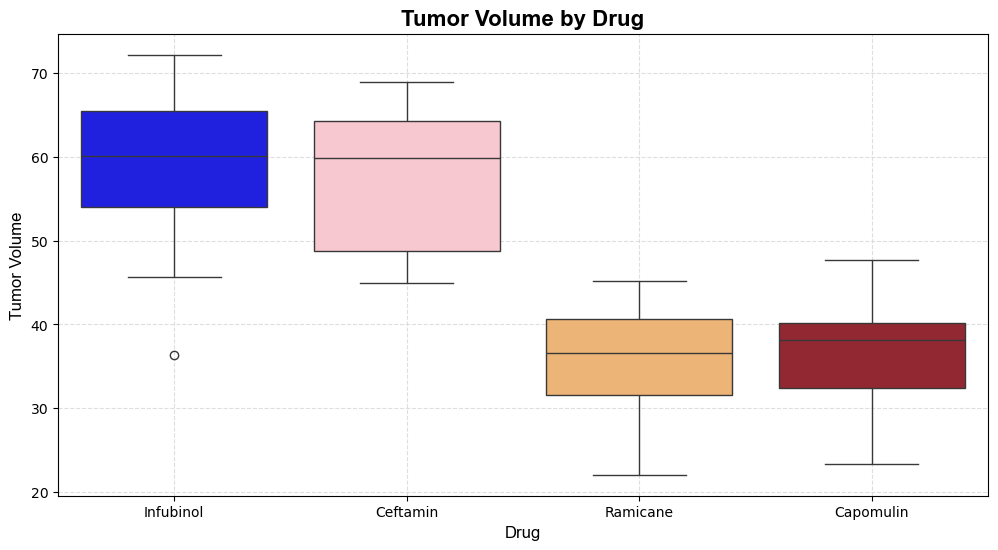

In [59]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

# Change Canvas Size
plt.figure(figsize=(12, 6))

palette = {"Infubinol": "blue", "Ceftamin": "pink", "Ramicane": "#FFB563", "Capomulin": "#A41623"}
# Create a basic plot
sns.boxplot(data=merge_df3, y="Tumor Volume (mm3)", x="Drug Regimen", palette=palette)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Drug", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume", fontfamily="Arial", fontsize=12)
plt.title("Tumor Volume by Drug", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
# plt.xlim(0,20)

# Show/Save the Graph
plt.show()

## Line and Scatter Plots

<Axes: xlabel='Timepoint'>

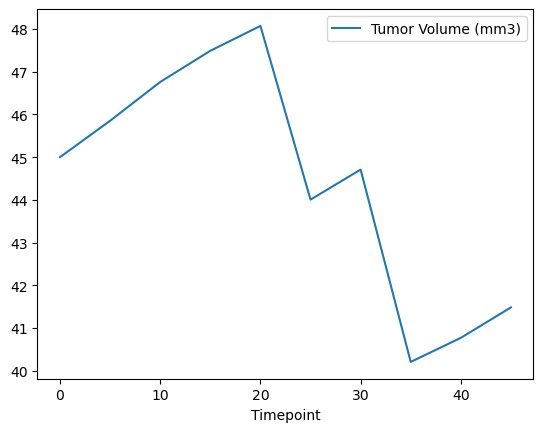

In [71]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = "l509"

merge_df4 = merge_df2.loc[merge_df2["Mouse ID"] == mouse]

merge_df4.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)")

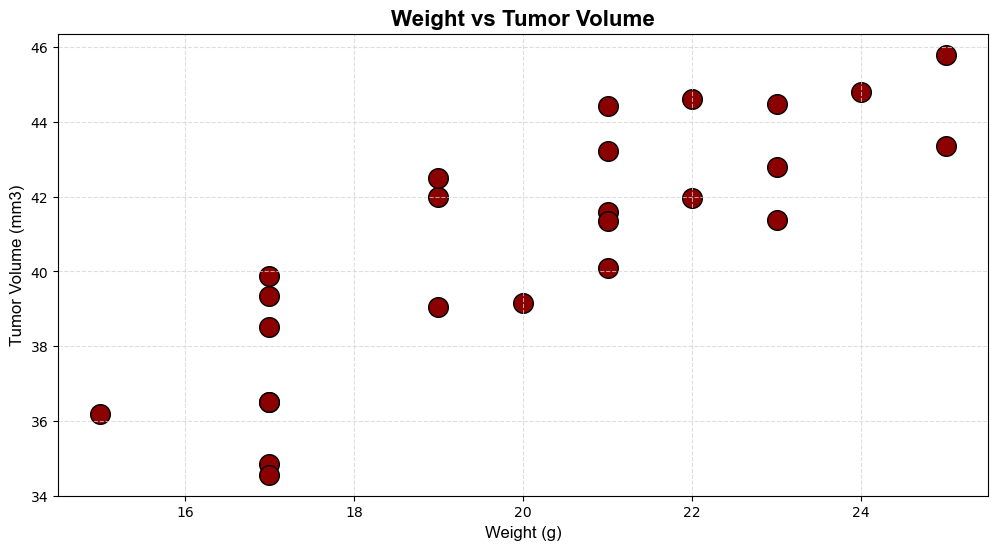

In [83]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = merge_df2[merge_df2['Drug Regimen'] == 'Capomulin']
avg_data = capomulin_data.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"}).reset_index()

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(avg_data["Weight (g)"], avg_data["Tumor Volume (mm3)"], color="darkred", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Weight (g)", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Weight vs Tumor Volume", fontweight="bold", fontsize=16, fontfamily="Arial")

# # Set X/Y Limits

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

## Correlation and Regression

In [93]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = avg_data["Weight (g)"]
y_values = avg_data["Tumor Volume (mm3)"]

# do regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept # these are the points/predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.95x + 21.55


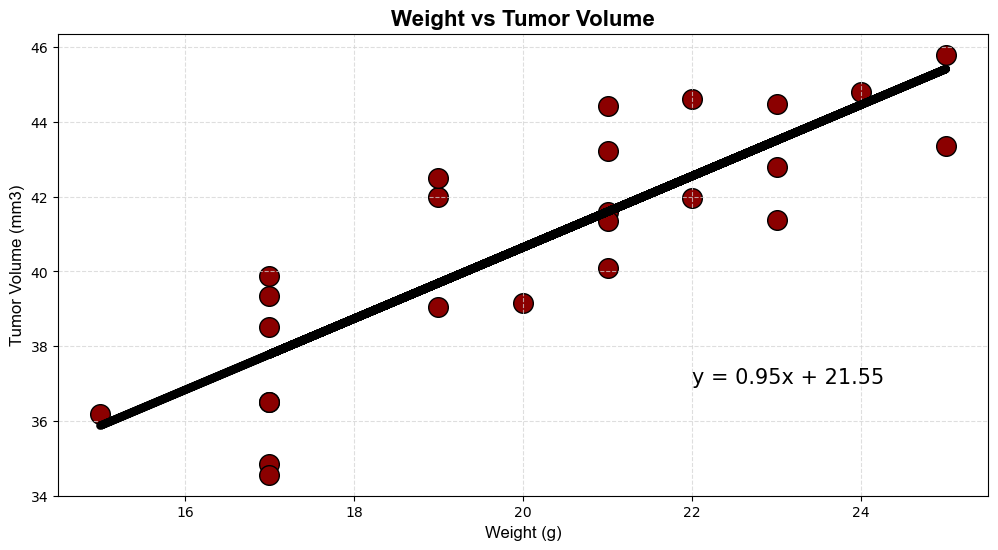

In [95]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(avg_data["Weight (g)"], avg_data["Tumor Volume (mm3)"], color="darkred", edgecolor="black", s=200)
plt.plot(avg_data["Weight (g)"], regress_values, color="black", linewidth=6) # the regression line

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Weight (g)", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Weight vs Tumor Volume", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Annotate
plt.annotate(line_eq, (22, 37), fontsize=15, color="black")

# Show/Save the Graph
plt.show()

In [97]:
corrs = avg_data.corr(numeric_only=True)
corrs

,Tumor Volume (mm3),Weight (g)
Tumor Volume (mm3),1.000000,0.841936
Weight (g),0.841936,1.000000
